# 효율적 투자 전략
* 대상 종목 : 주식, 채권

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



In [2]:
주식 = pd.read_csv("./datasets/kodex_stock.csv")
채권 = pd.read_csv("./datasets/kodex_bond10y.csv")

In [3]:
주식.shape, 채권.shape

((1845, 6), (1845, 6))

Q. 주식과 채권을 몇 대 몇으로 담아서 투자를 하면 가장 효율적인 투자일지?

In [4]:
주식

,dt,close,high,low,open,volume
0,2012-01-20,49960.0,50040.0,49960.0,50040.0,3276.0
1,2012-01-25,49960.0,49960.0,49960.0,49960.0,100.0
2,2012-01-26,49930.0,49985.0,49925.0,49960.0,1161.0
3,2012-01-27,50000.0,57200.0,49810.0,57200.0,104.0
4,2012-01-30,50130.0,50130.0,50000.0,50000.0,1080.0
...,...,...,...,...,...,...
1840,2019-07-17,71210.0,71220.0,71070.0,71080.0,344.0
1841,2019-07-18,71665.0,71665.0,71290.0,71290.0,1516.0
1842,2019-07-19,71770.0,71850.0,71670.0,71670.0,15083.0
1843,2019-07-22,71685.0,71755.0,71685.0,71740.0,1461.0


In [5]:
채권.set_index(채권['dt'])

,dt,close,high,low,open,volume
dt,,,,,,
2012-01-20,2012-01-20,23197.4,23264.1,22801.9,22833.0,5205309.50
2012-01-25,2012-01-25,23277.4,23539.6,23161.9,23197.4,7721437.00
2012-01-26,2012-01-26,23299.6,23428.5,23237.4,23428.5,2162210.50
2012-01-27,2012-01-27,23335.2,23419.6,23206.3,23419.6,3456417.50
2012-01-30,2012-01-30,23073.0,23308.5,23050.8,23241.9,2899746.25
...,...,...,...,...,...,...
2019-07-17,2019-07-17,27225.0,27340.0,27130.0,27310.0,1886297.00
2019-07-18,2019-07-18,27165.0,27260.0,27065.0,27180.0,2290347.00
2019-07-19,2019-07-19,27545.0,27610.0,27315.0,27315.0,2532920.00


# 기대수익률(로그)

In [6]:
주식기대수익률 = np.log1p(주식['close'].pct_change())
채권기대수익률 = np.log1p(채권['close'].pct_change())

In [7]:
주식기대수익률

0            NaN
1       0.000000
2      -0.000601
3       0.001401
4       0.002597
          ...   
1840    0.002179
1841    0.006369
1842    0.001464
1843   -0.001185
1844   -0.000140
Name: close, Length: 1845, dtype: float64

In [20]:
기대수익률 = pd.DataFrame(np.array(주식기대수익률), columns = ['주식기대수익률'])

기대수익률['채권기대수익률'] = 채권기대수익률


기대수익률 = 기대수익률.set_index(채권['dt'])

In [21]:
# 기대수익률.dropna(axis = 0, inplace = True)
기대수익률

,주식기대수익률,채권기대수익률
dt,,
2012-01-25,0.000000,0.003443
2012-01-26,-0.000601,0.000953
2012-01-27,0.001401,0.001527
2012-01-30,0.002597,-0.011300
2012-01-31,0.000997,0.005377
...,...,...
2019-07-17,0.002179,-0.008959
2019-07-18,0.006369,-0.002206
2019-07-19,0.001464,0.013892


## 일별 기대수익률

In [22]:
기대수익률.mean()

주식기대수익률    0.000196
채권기대수익률    0.000096
dtype: float64

## 연별 기대수익률

In [23]:
기대수익률.mean() * 252 * 100

주식기대수익률    4.932303
채권기대수익률    2.409423
dtype: float64

# 리스크

In [24]:
일간변동성 = 기대수익률.std()
일간변동성

주식기대수익률    0.002763
채권기대수익률    0.008127
dtype: float64

In [25]:
연간변동성 = (기대수익률.std() * np.sqrt(252)) * 100
연간변동성

주식기대수익률     4.385422
채권기대수익률    12.901711
dtype: float64

# 공분산 리스크

<AxesSubplot: >

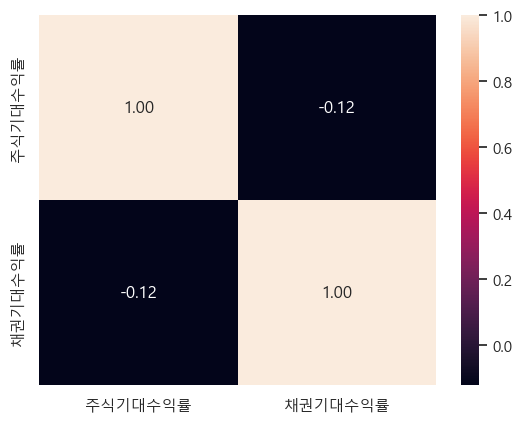

In [26]:
sns.heatmap(기대수익률.corr(), annot = True, fmt = '.2f') 

In [27]:
cov_df = 기대수익률.cov()
cov_df

,주식기대수익률,채권기대수익률
주식기대수익률,0.000008,-0.000003
채권기대수익률,-0.000003,0.000066


## 기대수익률의 편차(std)를 이용한 연간 리스크

In [28]:
(기대수익률.std()*100).values

array([0.27625562, 0.81273137])

# 효율적 투자 전략

In [47]:
annual_ret = 기대수익률.mean()   * 252
annual_cov = 기대수익률.cov() * 252

port_ret     = [] 
port_risk    = [] 
port_weights = [] 
port_sharp   = [] 
stocks = ['주식','채권']

for _ in range(30000): 
    weights = np.random.random(len(stocks)) 
    weights = weights / np.sum(weights) 

    #------------------- 포폴 수익률, 리스크(편차), 샤프지수 -----------------------
    returns = np.dot(weights, annual_ret) 
    risk    = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 
    sharp   =  returns / risk #샤프지수
    
    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(np.round(weights,4)) 
    port_sharp.append(sharp) 
    
    
port_dic = {'기대수익률': port_ret, '리스크': port_risk, '샤프지수':port_sharp ,'가중치': port_weights} 
pdf = pd.DataFrame(port_dic) 
# print(f'{stocks}')
pdf.head()

,기대수익률,리스크,샤프지수,가중치
0,0.045564,0.039846,1.143511,"[0.851, 0.149]"
1,0.034818,0.074251,0.468923,"[0.4251, 0.5749]"
2,0.036960,0.064447,0.573485,"[0.5099, 0.4901]"
3,0.031988,0.088037,0.363350,"[0.3129, 0.6871]"
4,0.038546,0.057718,0.667835,"[0.5728, 0.4272]"


In [48]:
# 샤프치수   최대 포트
sharp_max = pdf[pdf['샤프지수'] == pdf['샤프지수'].max()]['샤프지수'].values[0]

# 위험리스크 최소 포트
risk_min  = pdf[pdf['리스크'] == pdf['리스크'].min()] ['리스크'].values[0]
# 수익률     최대 포트
return_max = pdf[pdf['기대수익률'] == pdf['기대수익률'].max()] ['기대수익률'].values[0]

print(f'Expected annual return: {return_max:.4f}')
print(f'Annual volatility: {risk_min:.4f}')
print(f'Sharpe Ratio: {sharp_max:.4f}')

Expected annual return: 0.0493
Annual volatility: 0.0398
Sharpe Ratio: 1.1710


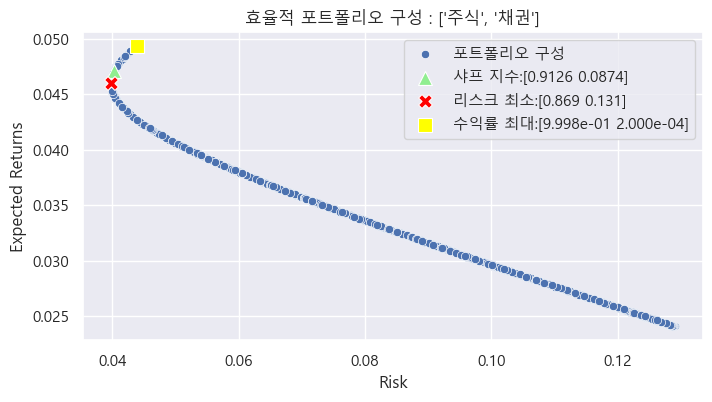

In [49]:
# 샤프치수   최대 포트
sharp_max = pdf[pdf['샤프지수'] == pdf['샤프지수'].max()]
# 위험리스크 최소 포트
risk_min  = pdf[pdf['리스크'] == pdf['리스크'].min()] 
# 수익률     최대 포트
return_max = pdf[pdf['기대수익률'] == pdf['기대수익률'].max()] 

plt.figure(figsize=(8,4))
sns.scatterplot(data=pdf        , x='리스크', y='기대수익률'                     , label=f"포트폴리오 구성")
sns.scatterplot(data=sharp_max , x='리스크', y='기대수익률', marker="^", c='lightgreen',s=100, label=f"샤프 지수:{sharp_max['가중치'].values[0]}")
sns.scatterplot(data=risk_min  , x='리스크', y='기대수익률', marker="X", c='red', s=100,label=f"리스크 최소:{risk_min['가중치'].values[0]}")
sns.scatterplot(data=return_max, x='리스크', y='기대수익률', marker="s", c='yellow', s=100,label=f"수익률 최대:{return_max['가중치'].values[0]}")

plt.title(f'효율적 포트폴리오 구성 : {stocks}') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 